# **WEB SCRAPPING**

## **1. Using Selenium & BeautifulSoup**

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

# Setup options
options = Options()
options.add_argument("--headless")  # Run in background
options.add_argument("--no-sandbox") # Required for Colab
options.add_argument("--disable-dev-shm-usage") # Required for Colab
options.add_argument("--disable-gpu") # Added for potential compatibility
options.add_argument("--window-size=1920,1080") # Added to ensure a consistent window size

# Use the ChromeDriver from the downloaded bundle
service = Service(executable_path='./chromedriver-linux64/chromedriver')
options.binary_location = './chrome-linux64/chrome'
driver = webdriver.Chrome(service=service, options=options)


# Step 1: Load Yahoo Finance AAPL historical data page
url = "https://finance.yahoo.com/quote/AAPL/history"
driver.get(url)
time.sleep(5)  # wait for data to load

# Step 2: Parse HTML
soup = BeautifulSoup(driver.page_source, "html.parser")
rows = soup.find_all('tr')

# Step 3: Extract data
data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 7:
        date = cols[0].text
        close_price = cols[5].text
        stock = cols[6].text
        data.append([date, close_price, stock])

driver.quit()

# Step 4: Save to DataFrame
df = pd.DataFrame(data, columns=["Date", "Close", "stock"])
df.to_csv("aapl_prices.csv", index=False)
print(df.head())

           Date   Close       stock
0   Jul 7, 2025  209.95  50,103,300
1   Jul 3, 2025  213.55  34,955,800
2   Jul 2, 2025  212.44  67,941,800
3   Jul 1, 2025  207.82  78,788,900
4  Jun 30, 2025  205.17  91,912,800


# **2. Using YFINANCE**

In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Download data for AAPL (Apple Inc.)
# You can change the ticker (e.g., "AAPL" to "RELIANCE.NS" for Indian stocks)
df = yf.download("AAPL", period="60d")  # past 60 days

# Step 2: Display the first few rows
print(df.head())

# Step 3: Save the data to CSV
df.to_csv("aapl_stock_data.csv")

print("CSV file 'aapl_stock_data.csv' has been saved.")

/tmp/ipython-input-3-3655519642.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="60d")  # past 60 days
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-04-09  198.589584  200.347274  171.664886  171.724805  184395900
2025-04-10  190.170624  194.524915  182.760343  188.822401  121880000
2025-04-11  197.890488  199.278667  185.816325  185.856281   87435900
2025-04-14  202.254776  212.661128  200.896557  211.163092  101352900
2025-04-15  201.875275  203.243476  199.538343  201.595643   51343900
CSV file 'aapl_stock_data.csv' has been saved.


# **VISUALIZATION**

# 1. Price vs Time

/tmp/ipython-input-41-68897789.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="60d")
[*********************100%***********************]  1 of 1 completed


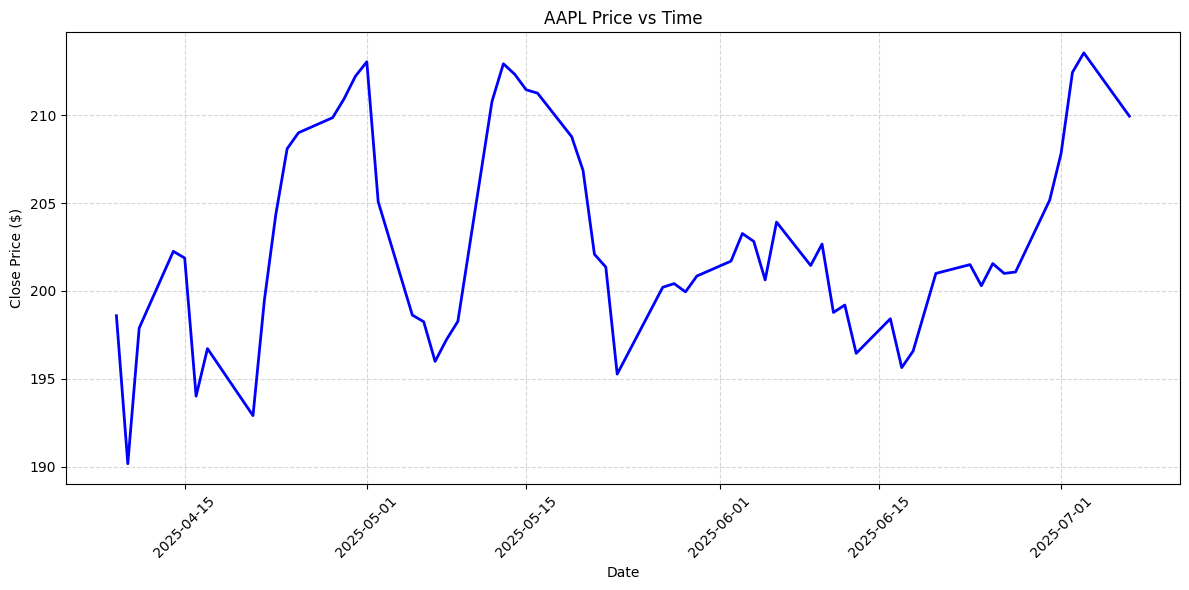

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Step 1: Download data
df = yf.download("AAPL", period="60d")

# Step 2: Plot using the index (which is Date)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', linewidth=2)
plt.title('AAPL Price vs Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Moving Averages


/tmp/ipython-input-17-4095445067.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="60d")
[*********************100%***********************]  1 of 1 completed


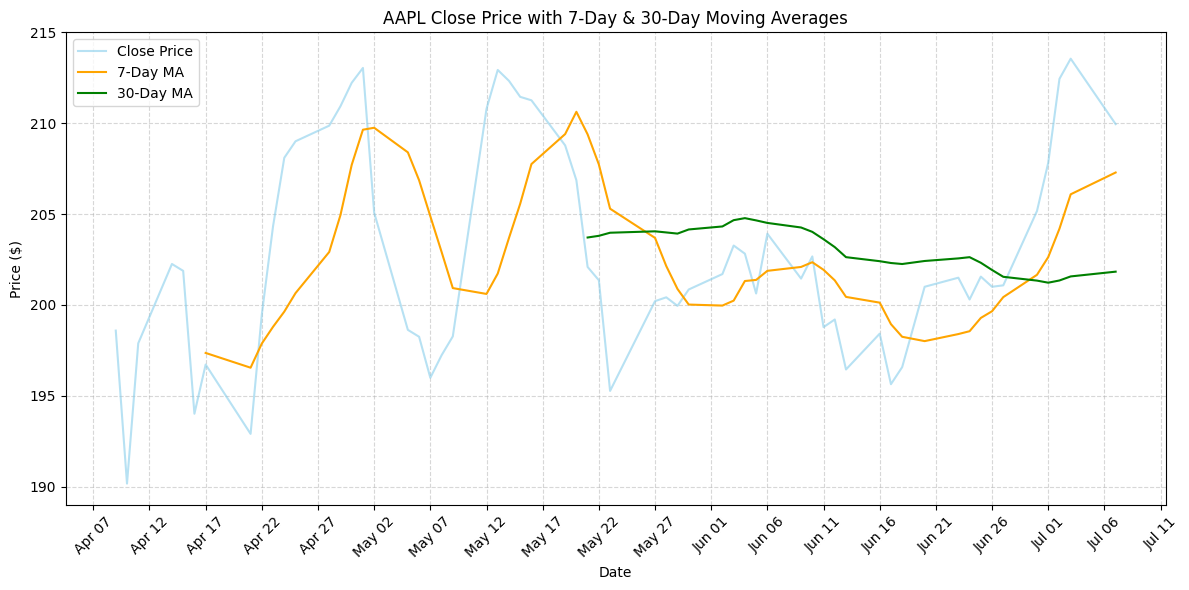

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Step 1: Download the data
df = yf.download("AAPL", period="60d")
df.reset_index(inplace=True)  # Reset index to access 'Date' as a column

# Step 2: Compute Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Step 3: Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.6, color='skyblue')
plt.plot(df['Date'], df['MA_7'], label='7-Day MA', color='orange')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA', color='green')

# Title and Labels
plt.title("AAPL Close Price with 7-Day & 30-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")

# X-axis formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)

# Y-axis tick cleanup
min_price = df[['Close', 'MA_7', 'MA_30']].min().min()
max_price = df[['Close', 'MA_7', 'MA_30']].max().max()
ytick_start = np.floor(min_price / 5) * 5
ytick_end = np.ceil(max_price / 5) * 5
yticks = np.arange(ytick_start, ytick_end + 1, 5)
plt.yticks(yticks)

# Final touches
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Histogram of Returns

/tmp/ipython-input-42-1436744296.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="60d")
[*********************100%***********************]  1 of 1 completed


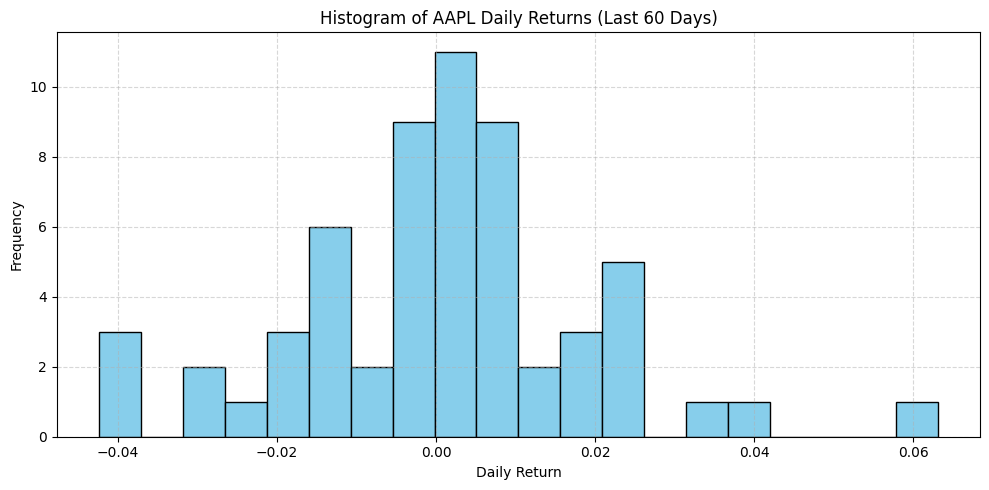

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download AAPL data
df = yf.download("AAPL", period="60d")

# Step 2: Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()  # returns in decimal (e.g., 0.01 = 1%)

# Step 3: Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df['Daily Return'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of AAPL Daily Returns (Last 60 Days)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
